In [1]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip uninstall opencv-python-headless==4.5.5.62 -y
!pip install opencv-python-headless

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ats3faol
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-ats3faol
  Resolved https://github.com/albu/albumentations to commit ce503af897b12b3e605b3b9450251523a8fa35a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from google.colab import drive

In [3]:
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/Dental-Segementation-and-Enumeration/"

Mounted at /content/drive


In [4]:
# Define paths
image_dir = drive_path+ "data/Radiographs/"
mask_dir = drive_path+'data/Segmentation/teeth_mask/'

# Get list of image and mask files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.JPG')])
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.jpg')])

In [5]:
# Ensure the number of images and masks match
assert len(image_files) == len(mask_files), "Mismatch between number of images and masks"


In [9]:
# Sample inspection
sample_index = 110
image_path = os.path.join(image_dir, image_files[sample_index])
mask_path = os.path.join(mask_dir, mask_files[sample_index])

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

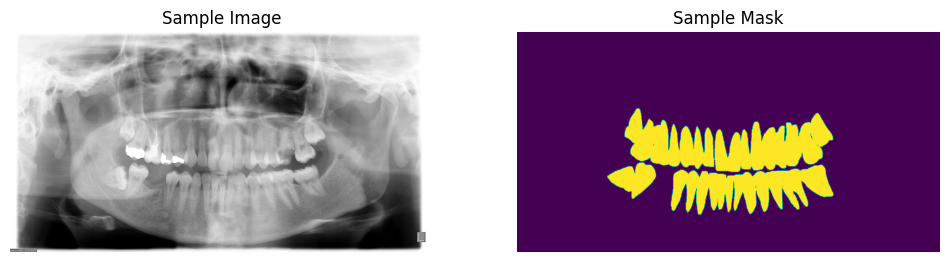

In [12]:
# Plot sample image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Sample Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sample Mask')
plt.imshow(mask)
plt.axis('off')

plt.show()

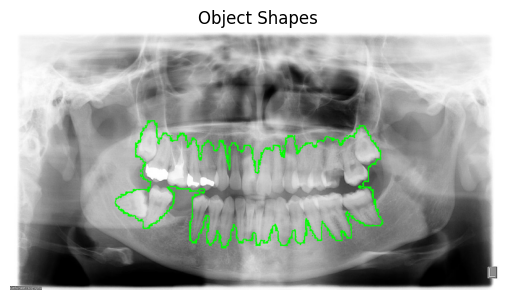

In [13]:
def plot_object_shapes(image_path, mask_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Object Shapes')
    plt.axis('off')
    plt.show()

plot_object_shapes(image_path, mask_path)


In [14]:
# Statistics
def get_image_stats(image_dir):
    sizes = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        with Image.open(img_path) as img:
            sizes.append(img.size)
    sizes = np.array(sizes)
    return sizes.mean(axis=0), sizes.std(axis=0)

image_mean_size, image_std_size = get_image_stats(image_dir)
print(f"Image Mean Size: {image_mean_size}, Image Std Size: {image_std_size}")

Image Mean Size: [1615.  840.], Image Std Size: [0. 0.]


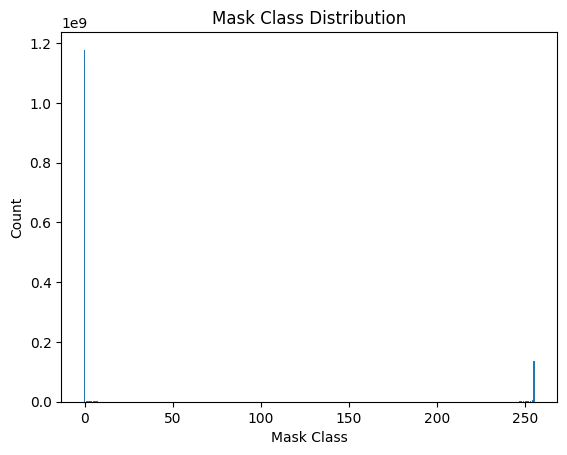

In [15]:
# Mask class distribution
def get_mask_class_distribution(mask_dir):
    class_counts = {}
    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        unique, counts = np.unique(mask, return_counts=True)
        for u, c in zip(unique, counts):
            if u in class_counts:
                class_counts[u] += c
            else:
                class_counts[u] = c
    return class_counts

mask_class_distribution = get_mask_class_distribution(mask_dir)
plt.bar(mask_class_distribution.keys(), mask_class_distribution.values())
plt.xlabel('Mask Class')
plt.ylabel('Count')
plt.title('Mask Class Distribution')
plt.show()

In [16]:
import os
import matplotlib.pyplot as plt
import cv2
dentex_dataset_path ='/content/drive/MyDrive/DentexSegAndDet/dentex_dataset/origin/unlabelled/xrays/'
def dataset_size(image_dir):
    num_images = len([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
    return num_images

print(f"Total number of images: {dataset_size(dentex_dataset_path)}")


Total number of images: 1571


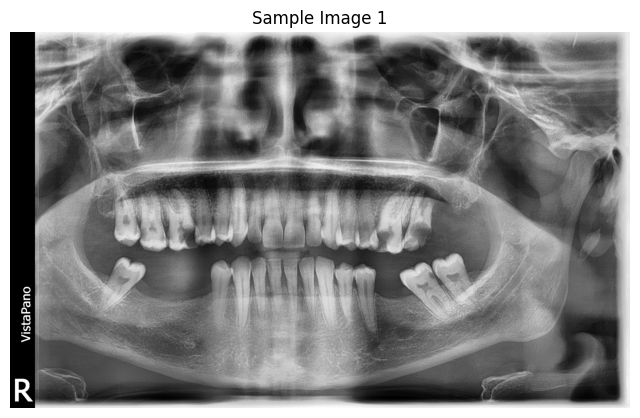

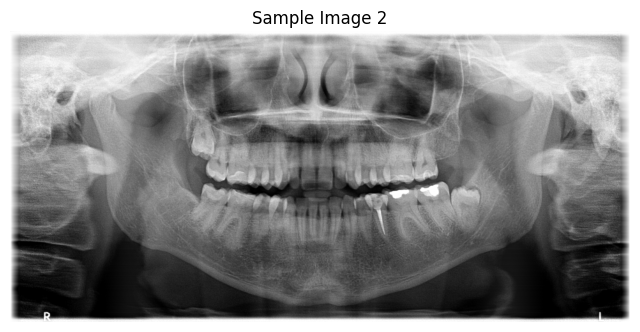

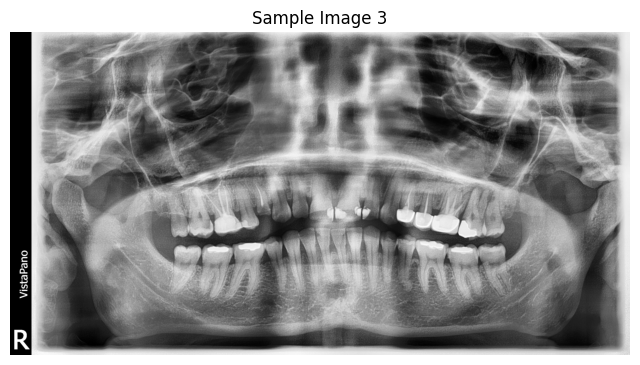

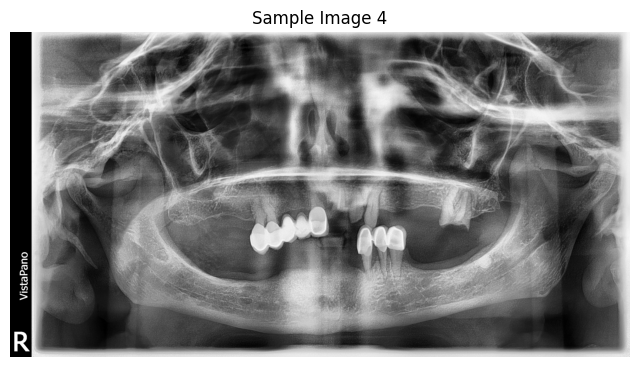

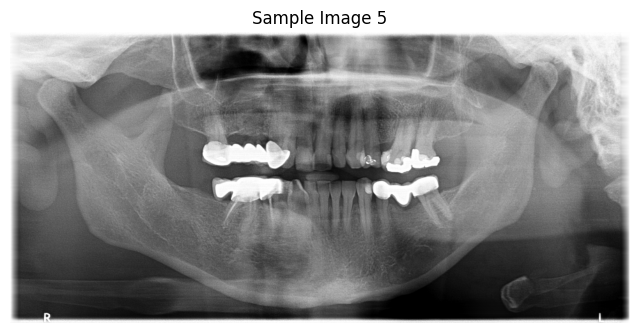

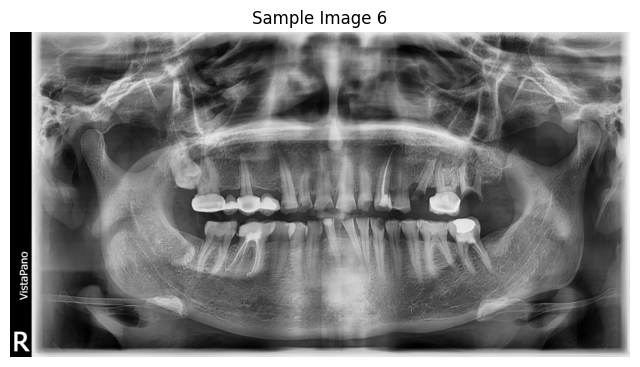

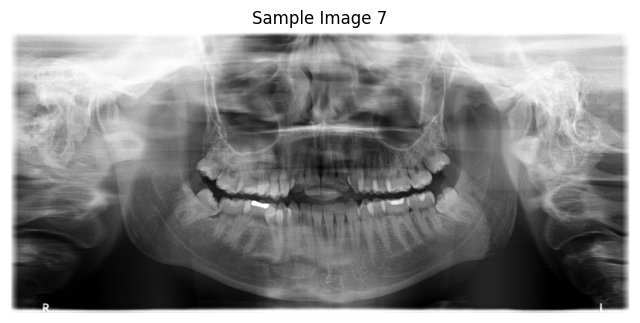

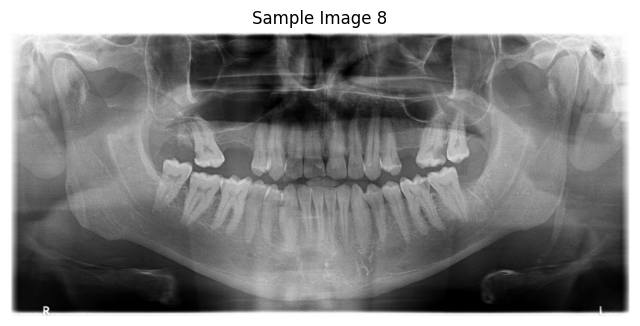

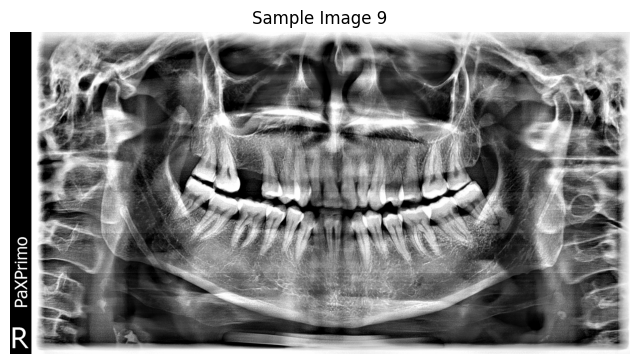

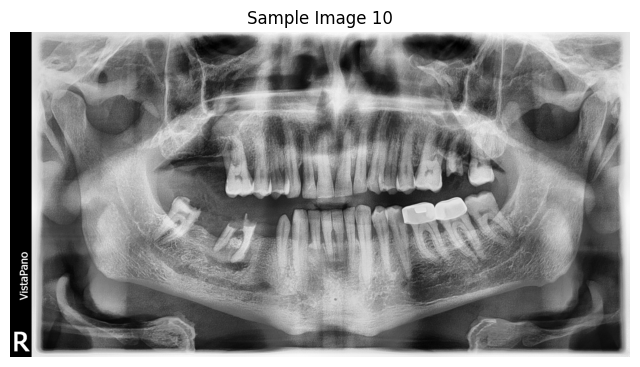

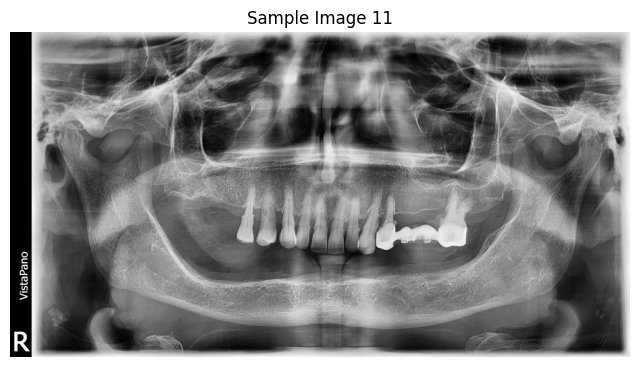

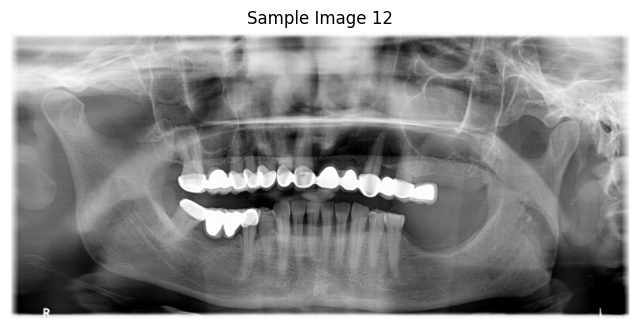

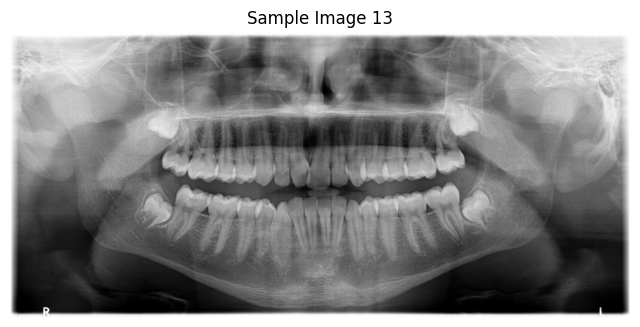

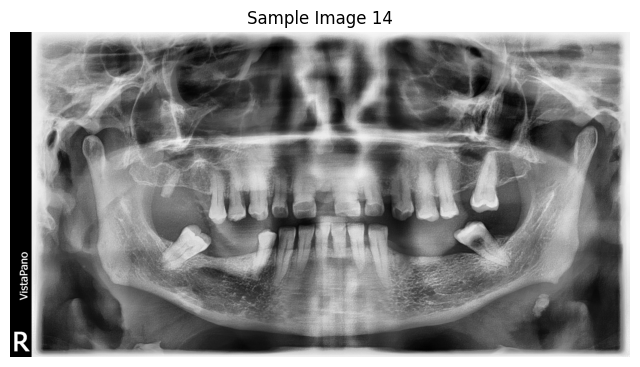

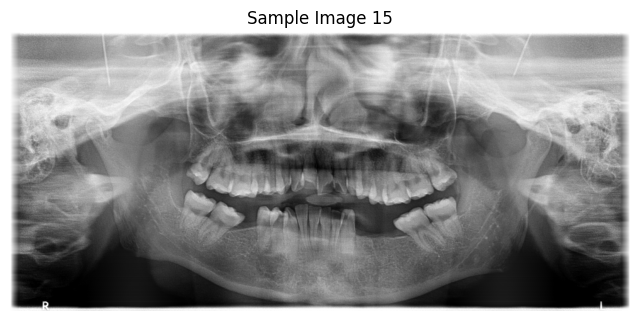

In [17]:
def display_sample_images(image_dir, num_samples=15):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

    for i in range(num_samples):
        img_path = os.path.join(image_dir, image_files[i])
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.title(f'Sample Image {i+1}')
        plt.axis('off')
        plt.show()

display_sample_images(dentex_dataset_path)


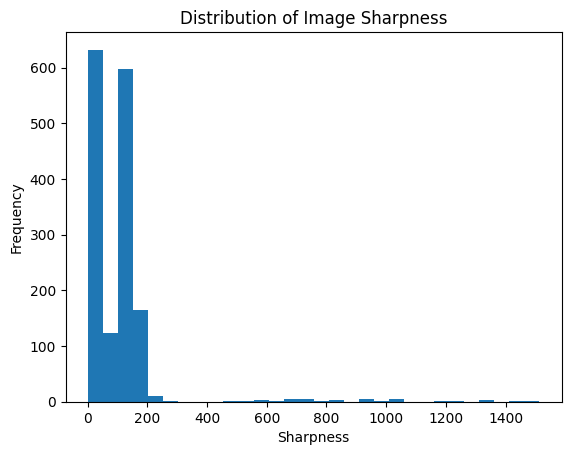

In [18]:
def calculate_sharpness(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def assess_sharpness(image_dir):
    sharpness_values = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        sharpness = calculate_sharpness(image)
        sharpness_values.append(sharpness)

    plt.hist(sharpness_values, bins=30)
    plt.xlabel('Sharpness')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Sharpness')
    plt.show()

assess_sharpness(dentex_dataset_path)


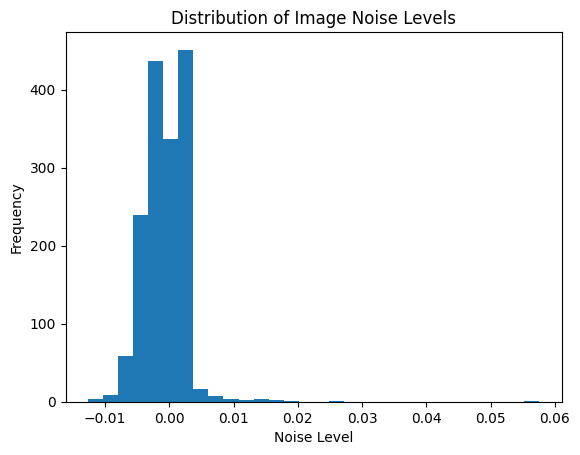

In [19]:
def assess_noise(image_dir):
    noise_values = []
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        noise = np.mean(cv2.Laplacian(image, cv2.CV_64F))
        noise_values.append(noise)

    plt.hist(noise_values, bins=30)
    plt.xlabel('Noise Level')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Noise Levels')
    plt.show()

assess_noise(dentex_dataset_path)
